<a href="https://colab.research.google.com/github/mohartikadar27/Assignment_2_-_Regression_-_MT_20A.ipynb/blob/main/Assignment_2_(_Regression_)_MT_20A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Importing Required Libraries**

In [ ]:
import pandas as pd #loading & handing dataframe
import numpy as np #mathematical calculation
import matplotlib.pyplot as plt #plotting graph
import seaborn as sns #visualization of data

from sklearn.model_selection import train_test_split #data splitting
from sklearn.linear_model import LinearRegression #loading of model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score #metrics calculation

from statsmodels.stats.outliers_influence import variance_inflation_factor #multicolinearity
import statsmodels.api as sm #statistical model estimation

**2. Loading the Dataset**

In [ ]:
df = pd.read_csv('car_data.csv')

**3. Exploratory Data Analysis (EDA)t**

In [ ]:
print("Dataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float

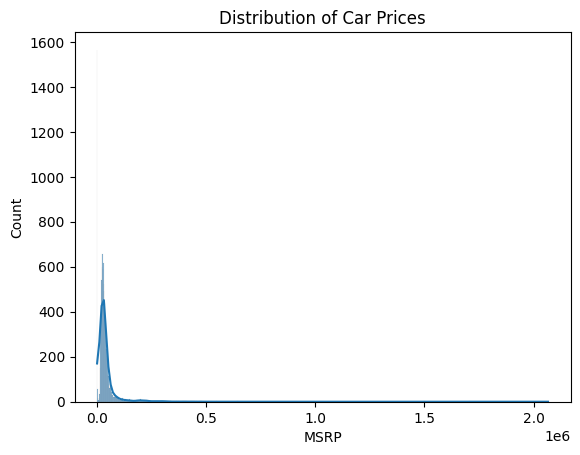

In [ ]:
sns.histplot(df['MSRP'], kde=True)
plt.title('Distribution of Car Prices')
plt.show()

**4. Handling Missing Values**

In [ ]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64


**5. Feature Engineering**

In [ ]:
# Create a new feature for car age
df['Car_Age'] = 2025 - df['Year']
# Encoding categorical variables
df = pd.get_dummies(df, drop_first=True)

In [ ]:
df = df.fillna(df.median())

**6. Defining Features (X) and Target Variable (y)**

In [ ]:
X = df.drop(columns=['MSRP'])
y = df['MSRP']

**7. Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**8. Splitting Data into Training and Testing Sets**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

**9. Building and Training the Linear Regression Model**

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
# Coefficients and intercept
print("\nModel Coefficients:")
print(model.coef_)
print("Model Intercept:", model.intercept_)


Model Coefficients:
[ 2465.37534969 12326.93237362   736.01203256 ...  -389.07407688
  -647.81665384  -314.33111594]
Model Intercept: 40541.00108687619


**10. Making Predictions**

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

**11. Evaluating Model Performance**

In [ ]:
print("\nModel Performance:")
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("Train R2 Score:", r2_score(y_train, y_train_pred))
print("Test R2 Score:", r2_score(y_test, y_test_pred))


Model Performance:
Train RMSE: 6983.368323995737
Test RMSE: 11691.758550443164
Train R2 Score: 0.9875590759118528
Test R2 Score: 0.9426502182755885


**12. Residual Analysis**

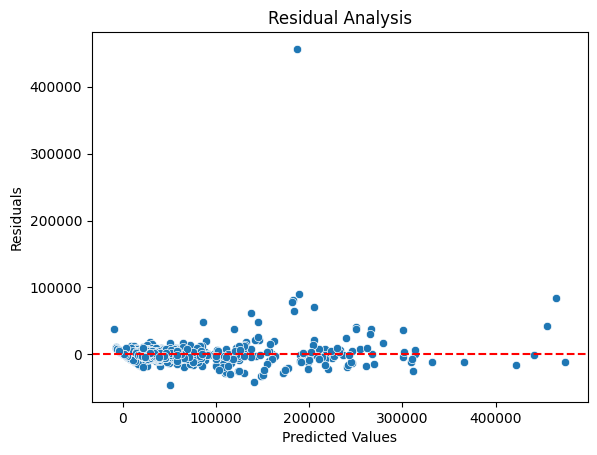

In [ ]:
residuals = y_test - y_test_pred
sns.scatterplot(x=y_test_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.show()

**13. Performing Statistical Analysis Using OLS Model**

In [ ]:
X_train_sm = sm.add_constant(X_train)  # Add constant for statsmodels
ols_model = sm.OLS(y_train, X_train_sm).fit()
print("\nOLS Model Summary:")
print(ols_model.summary())


OLS Model Summary:
                            OLS Regression Results                            
Dep. Variable:                   MSRP   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     672.6
Date:                Thu, 13 Feb 2025   Prob (F-statistic):               0.00
Time:                        16:01:31   Log-Likelihood:                -97886.
No. Observations:                9531   AIC:                         1.978e+05
Df Residuals:                    8524   BIC:                         2.050e+05
Df Model:                        1006                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          2465.3753    354.155